In [165]:
# coding: utf-8
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pylab as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cm 

#GP-UCB Code
class GPUCB(object):

  def __init__(self, meshgrid, environment, beta=100.):
    '''
    beta (optional): Hyper-parameter to tune the exploration-exploitation
    balance. If beta is large, it emphasizes the variance of the unexplored
    solution solution (i.e. larger curiosity)
    '''
    self.meshgrid = np.array(meshgrid)
    self.environment = environment
    self.beta = beta

    self.X_grid = self.meshgrid.reshape(self.meshgrid.shape[0], -1).T
    self.mu = np.array([0. for _ in range(self.X_grid.shape[0])])
    self.sigma = np.array([0.5 for _ in range(self.X_grid.shape[0])])
    self.X = []
    self.T = []

  def argmax_ucb(self):
    return np.argmax(self.mu + self.sigma * np.sqrt(self.beta))

  def learn(self):
    grid_idx = self.argmax_ucb()
    print grid_idx
    self.sample(self.X_grid[grid_idx])
    gp = GaussianProcessRegressor()
    gp.fit(self.X, self.T)
    self.mu, self.sigma = gp.predict(self.X_grid, return_std=True)

  def sample(self, x):
    t = self.environment.sample(x)
    self.X.append(x)
    self.T.append(t)

  def plot(self):
    
    fig = plt.figure(figsize=(18, 8))
    fig.suptitle("Iteration %02d" %len(self.X))
    
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_wireframe(self.meshgrid[0], self.meshgrid[1],
        self.mu.reshape(self.meshgrid[0].shape), alpha=0.5, color='g')
    ax.plot_wireframe(self.meshgrid[0], self.meshgrid[1],
        self.environment.sample(self.meshgrid), alpha=0.5, color='b')
    ax.scatter([x[0] for x in self.X], [x[1] for x in self.X], self.T, c='r',
        marker='o', alpha=1.0)
    ax1 = fig.add_subplot(1, 2, 2)
    ax1 = plt.subplot(122)
    ax1.pcolormesh(self.meshgrid[0], self.meshgrid[1],
        self.mu.reshape(self.meshgrid[0].shape))
  
    plt.savefig('fig_%02d.png' % len(self.X))




Sampling Location 0 is
0
Sampling Location 1 is
575
Sampling Location 2 is
23
Sampling Location 3 is
552
Sampling Location 4 is
300
Sampling Location 5 is
131
Sampling Location 6 is
293
Sampling Location 7 is
467
Sampling Location 8 is
283
Sampling Location 9 is
425
Sampling Location 10 is
192
Sampling Location 11 is
15
Sampling Location 12 is
384
Sampling Location 13 is
7
Sampling Location 14 is
191
Sampling Location 15 is
383
Sampling Location 16 is
559
Sampling Location 17 is
567
Sampling Location 18 is
161
Sampling Location 19 is
149
Sampling Location 20 is
414
Sampling Location 21 is
225
Sampling Location 22 is
370
Sampling Location 23 is
288
Sampling Location 24 is
287
Sampling Location 25 is
230
Sampling Location 26 is
351
Sampling Location 27 is
479
Sampling Location 28 is
96
Sampling Location 29 is
11


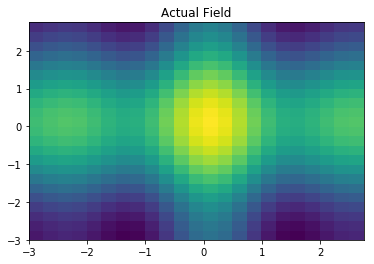

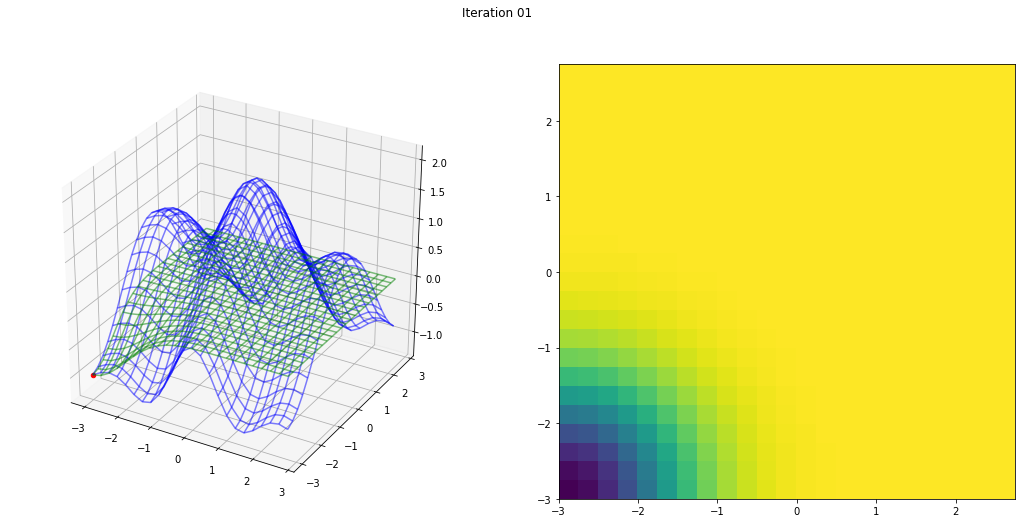

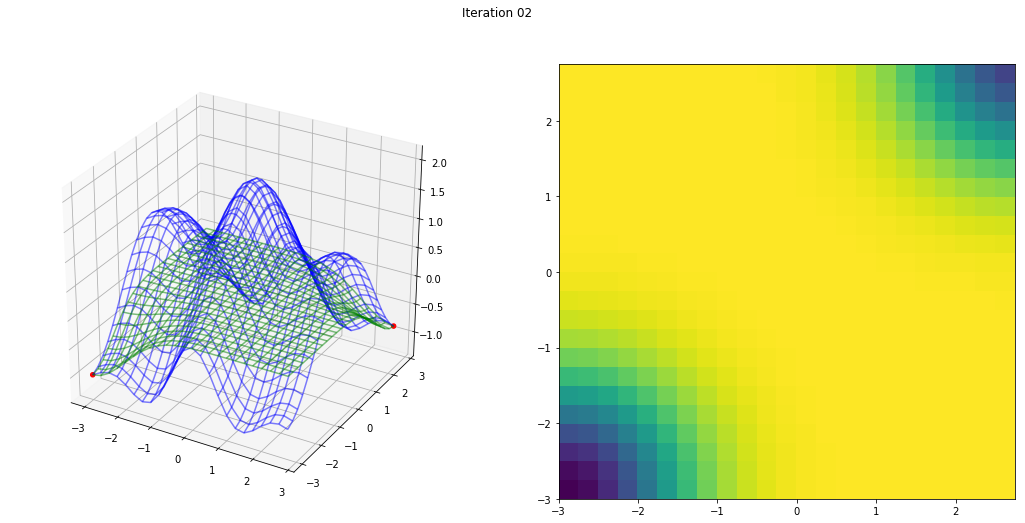

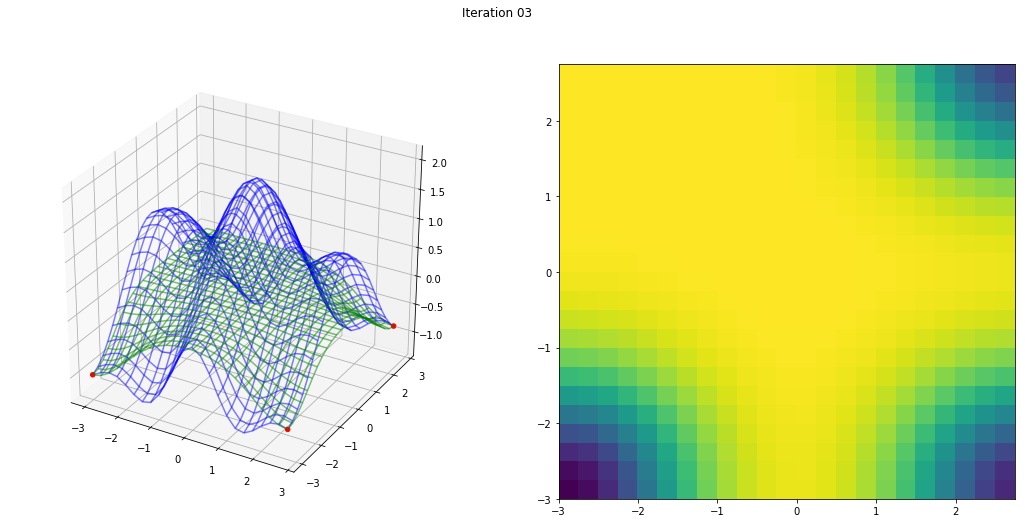

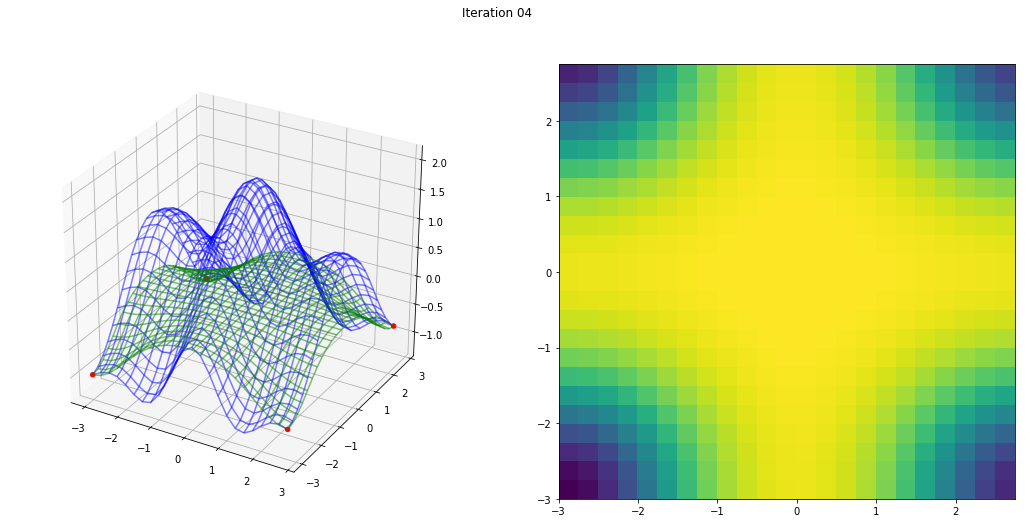

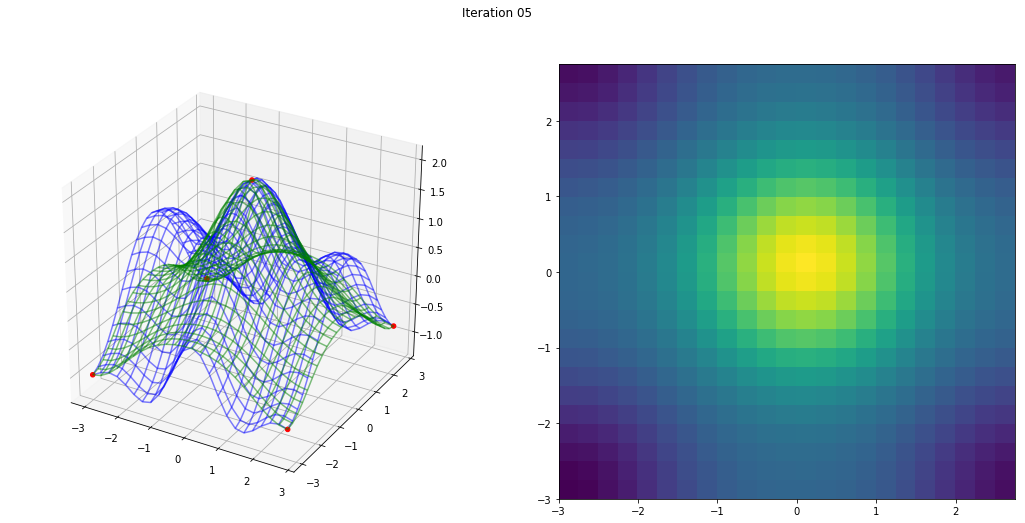

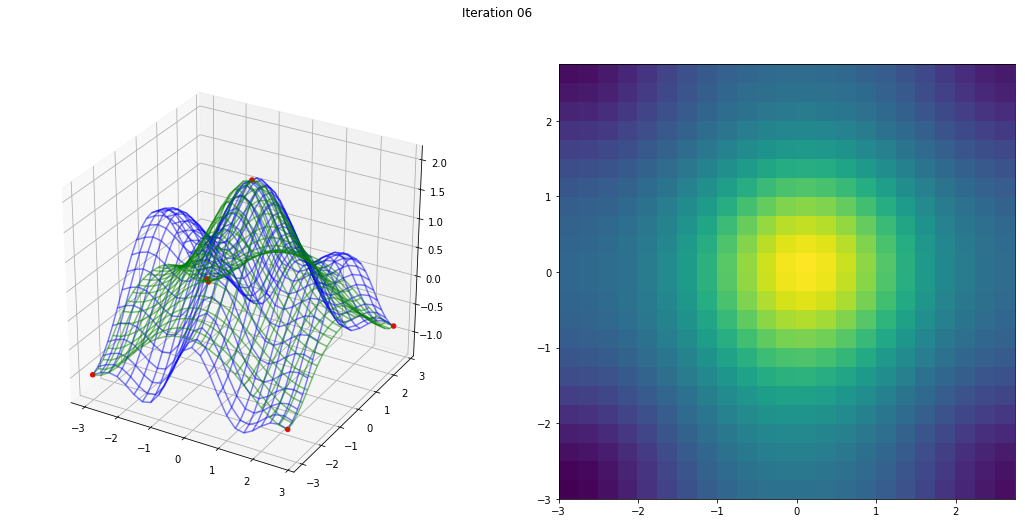

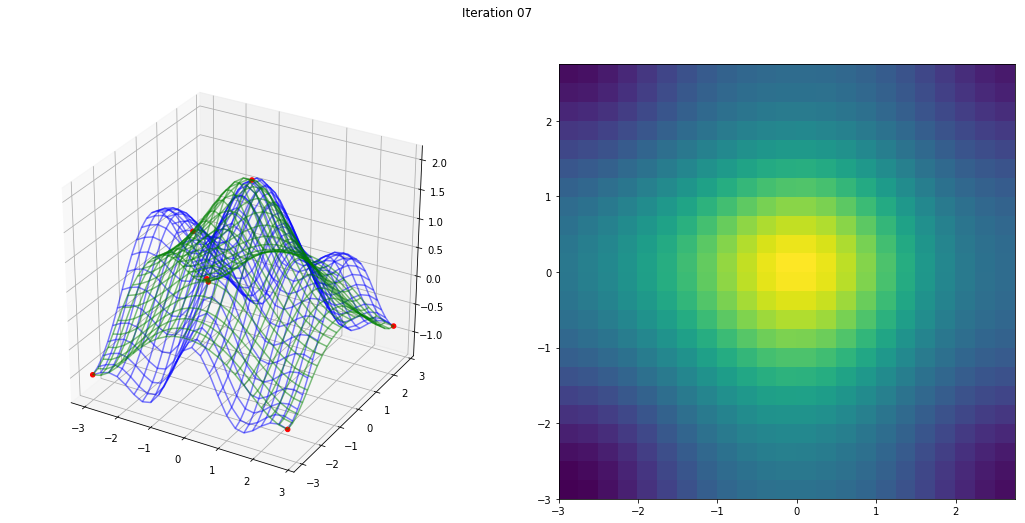

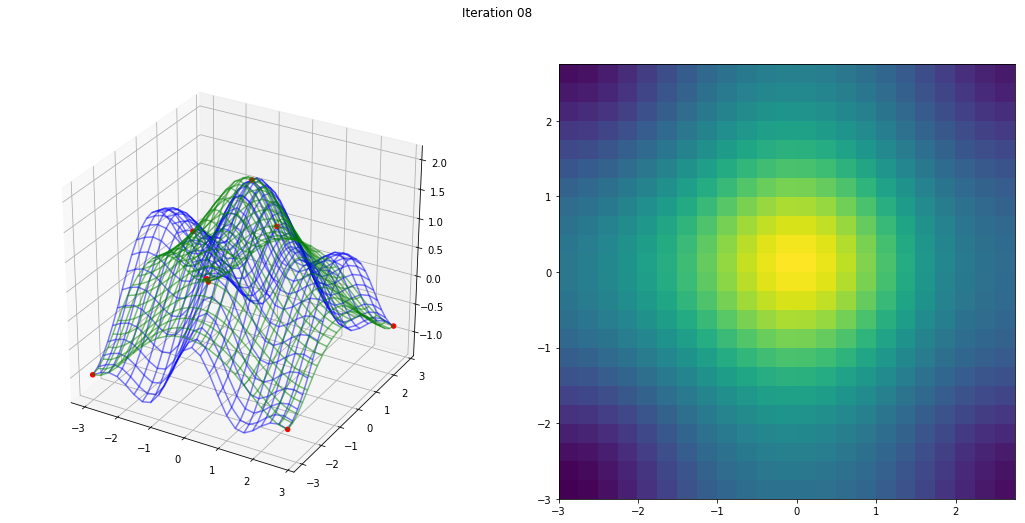

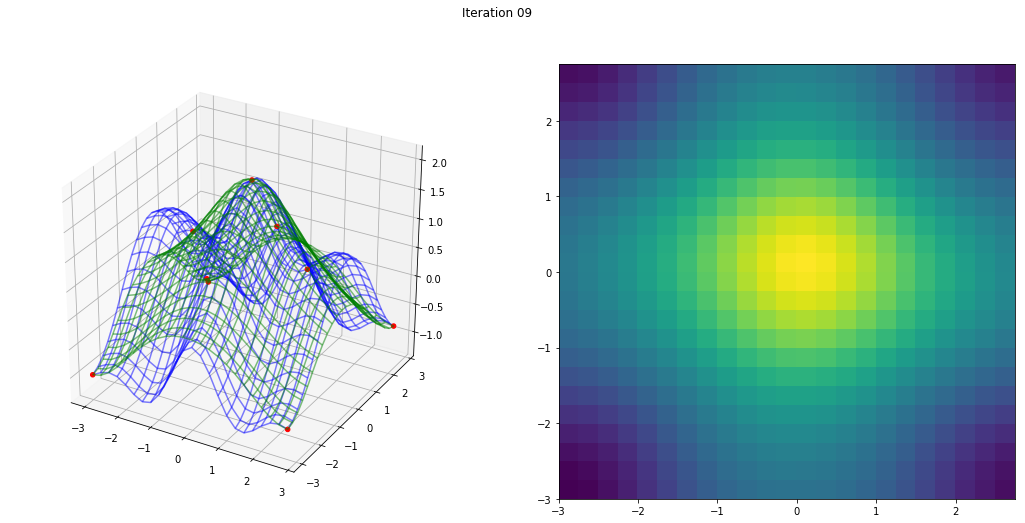

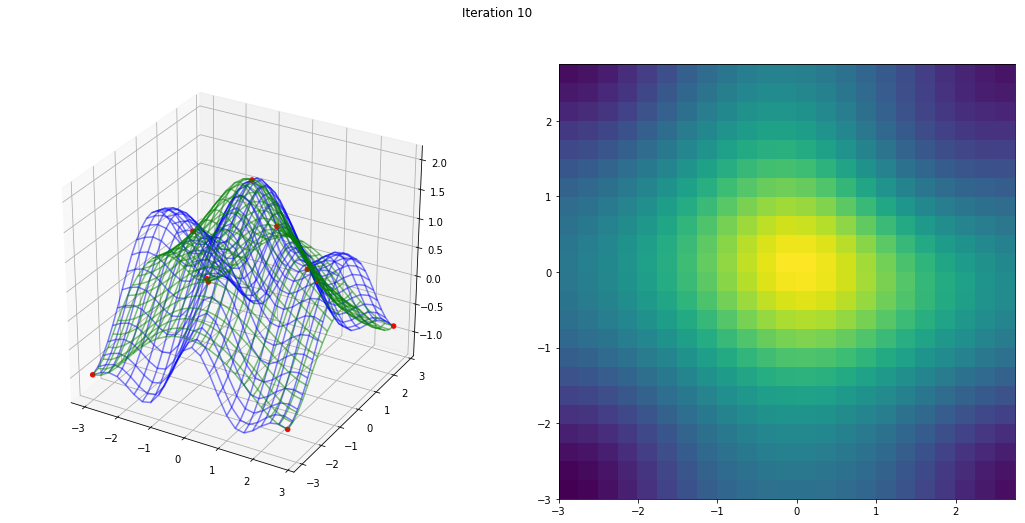

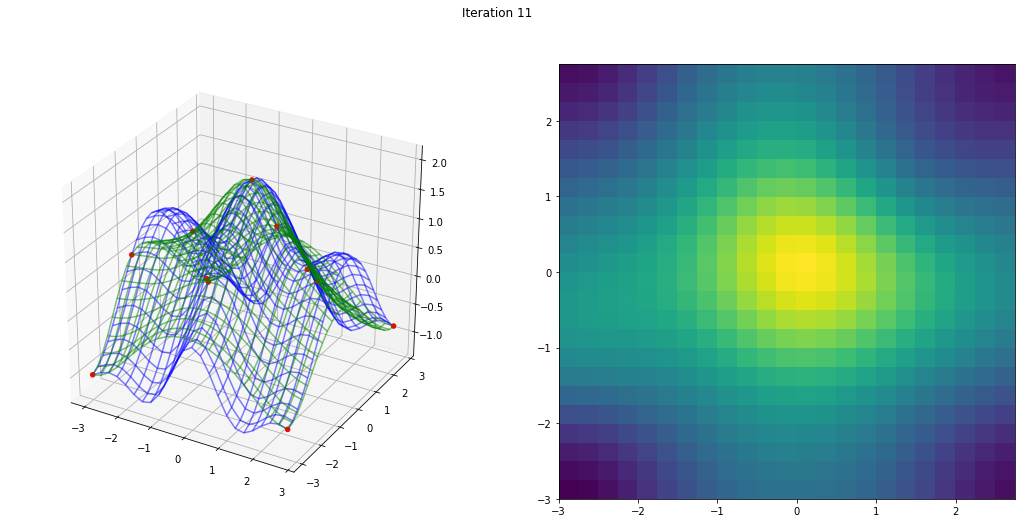

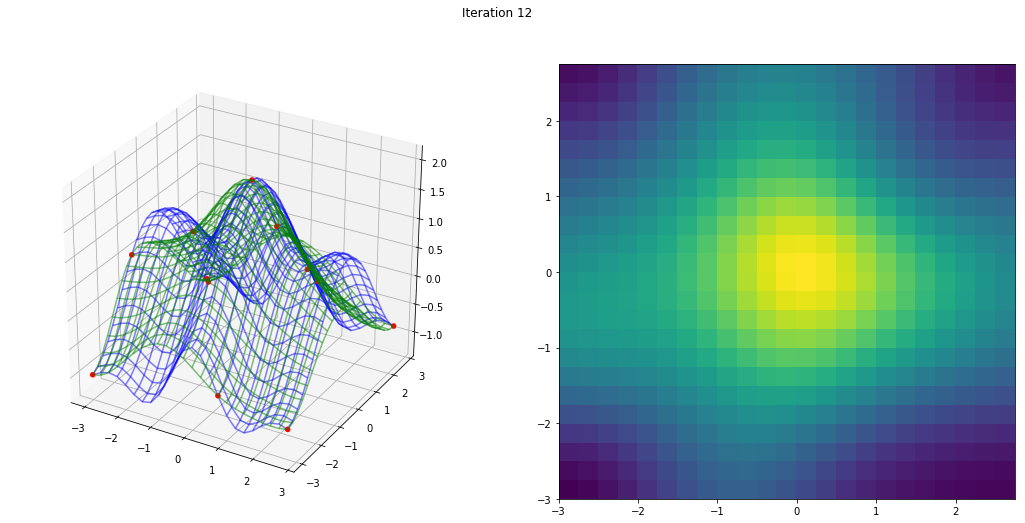

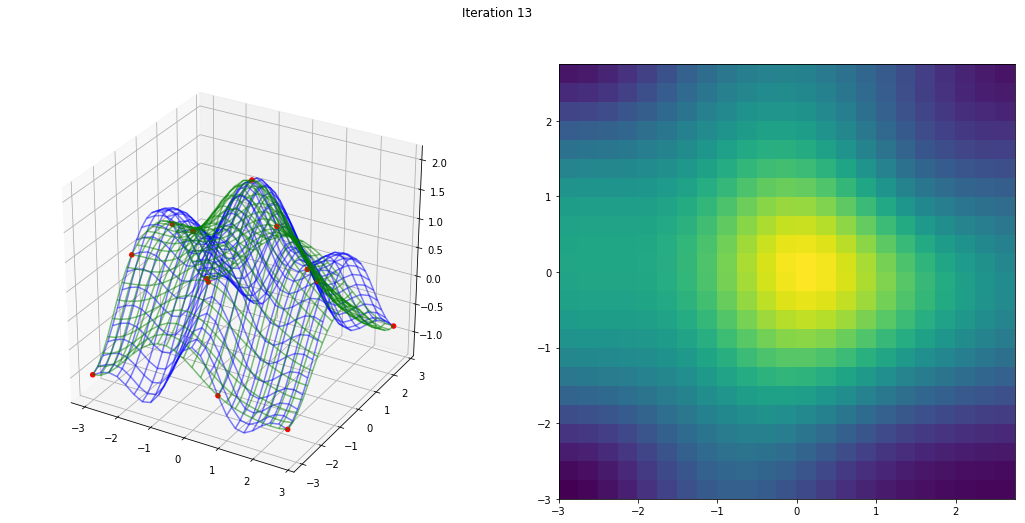

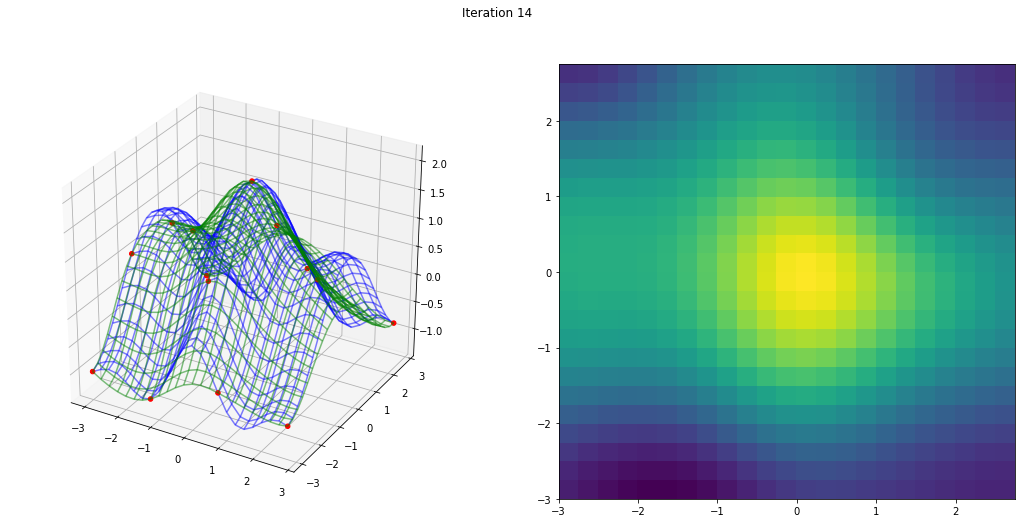

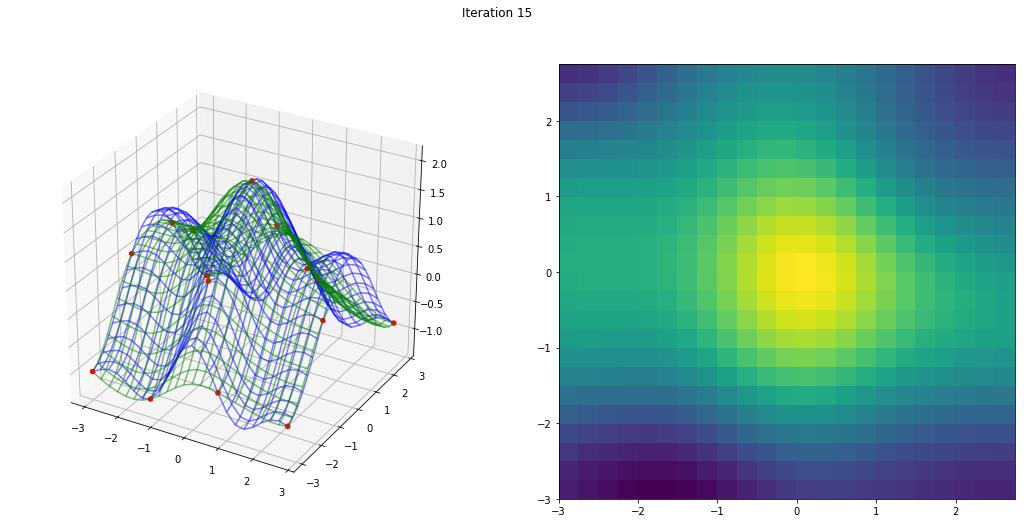

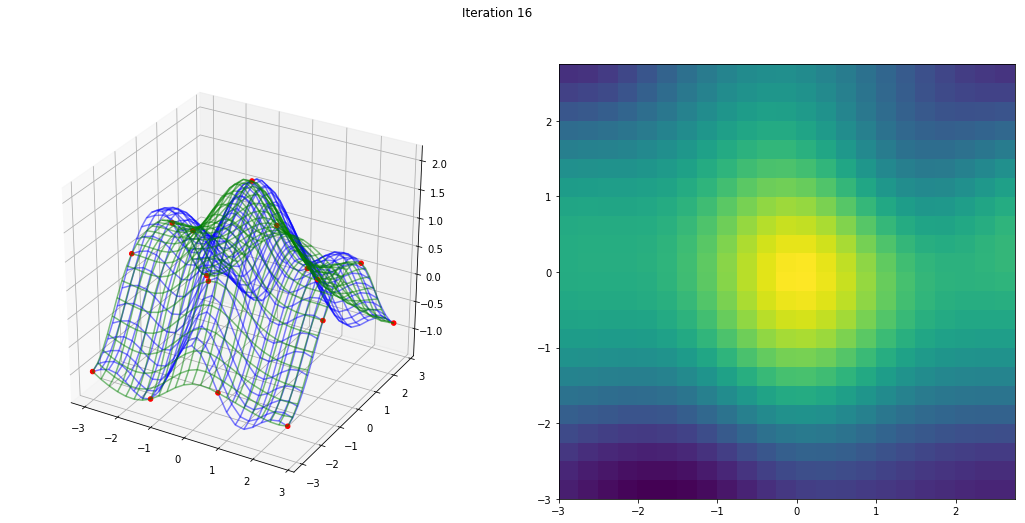

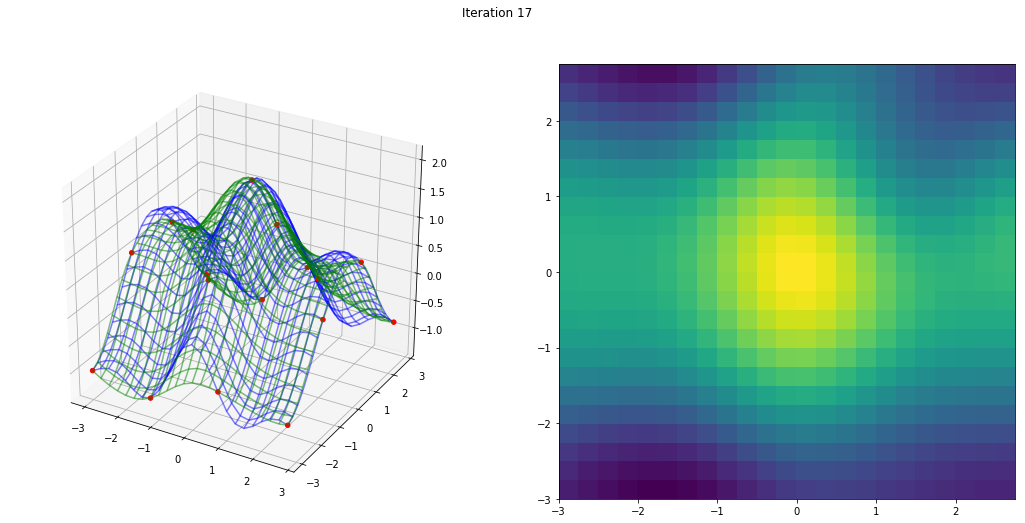

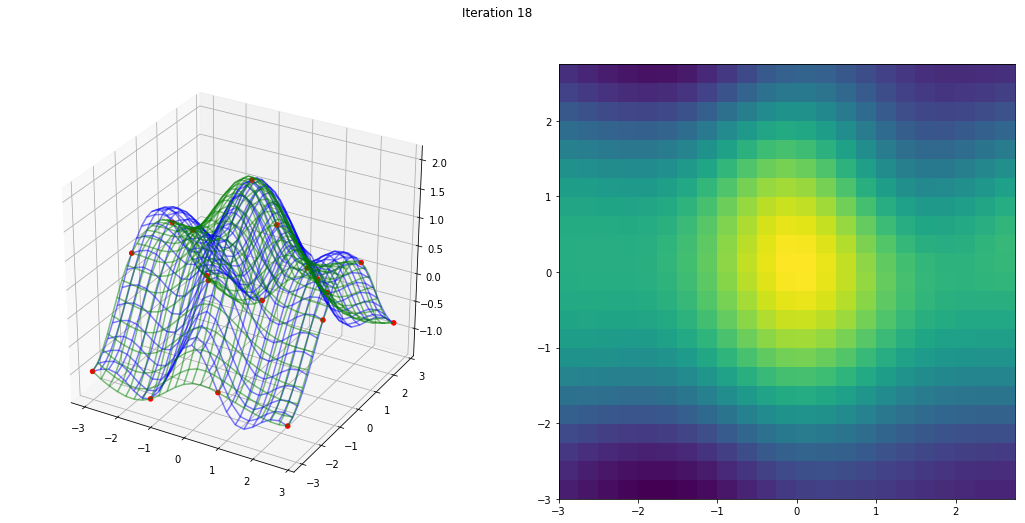

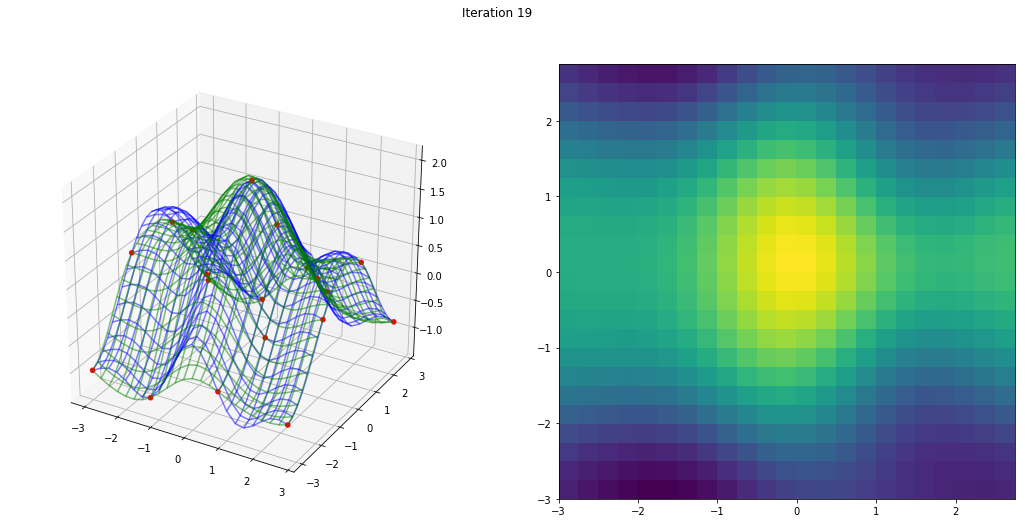

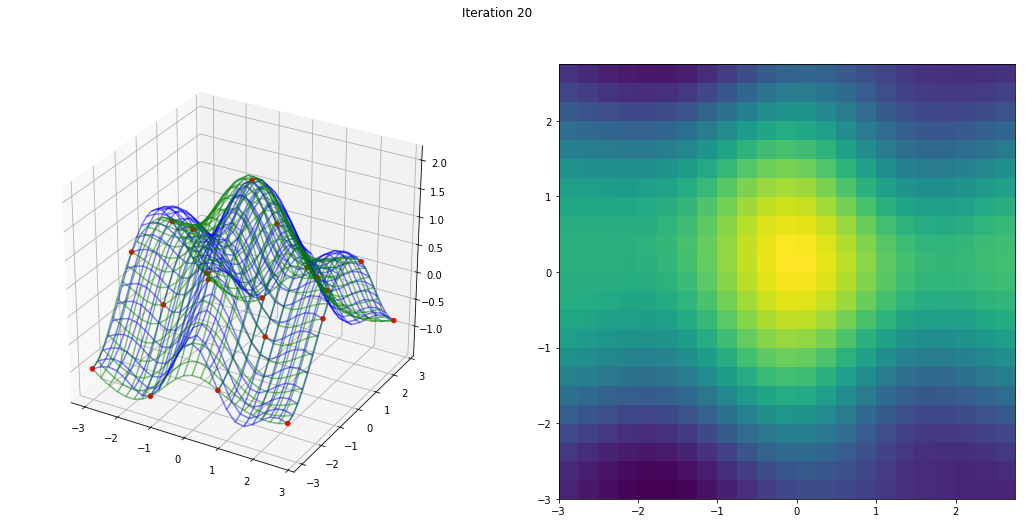

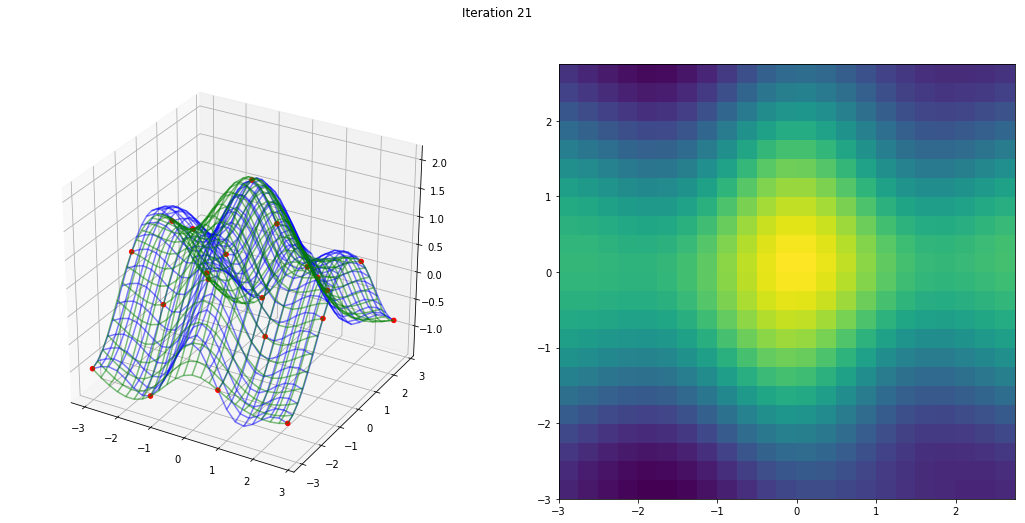

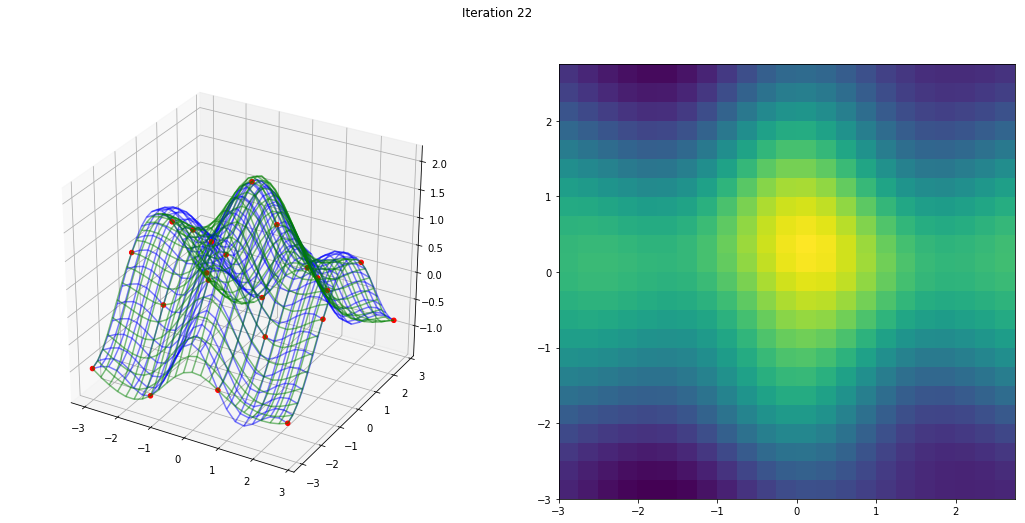

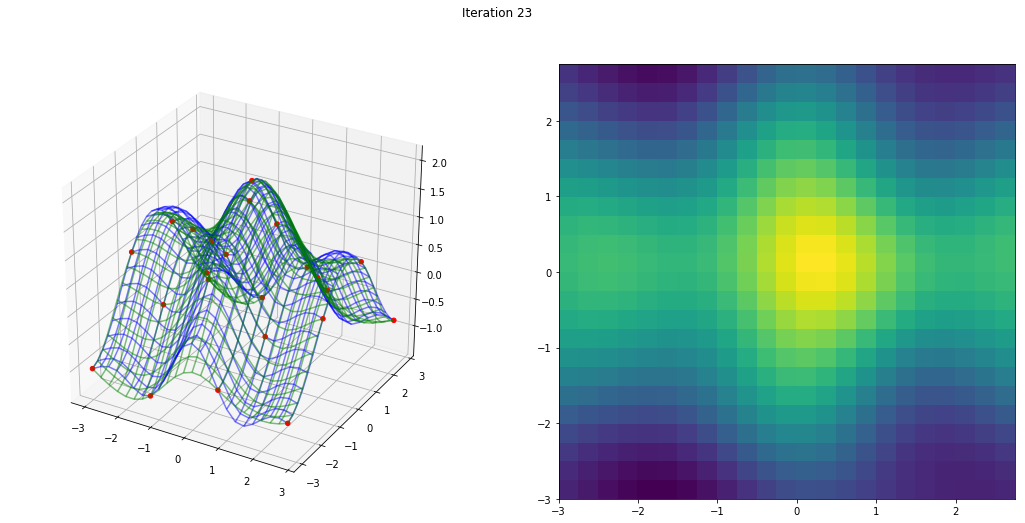

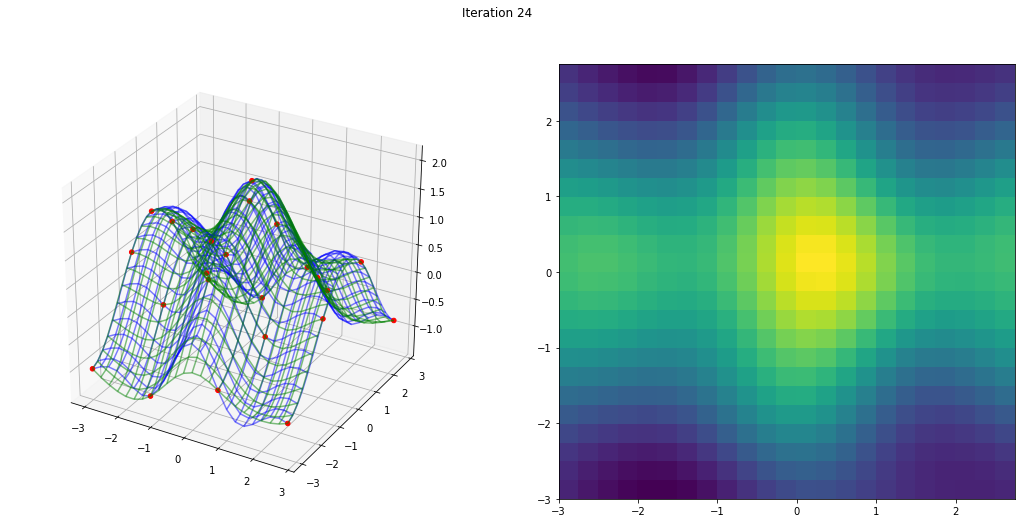

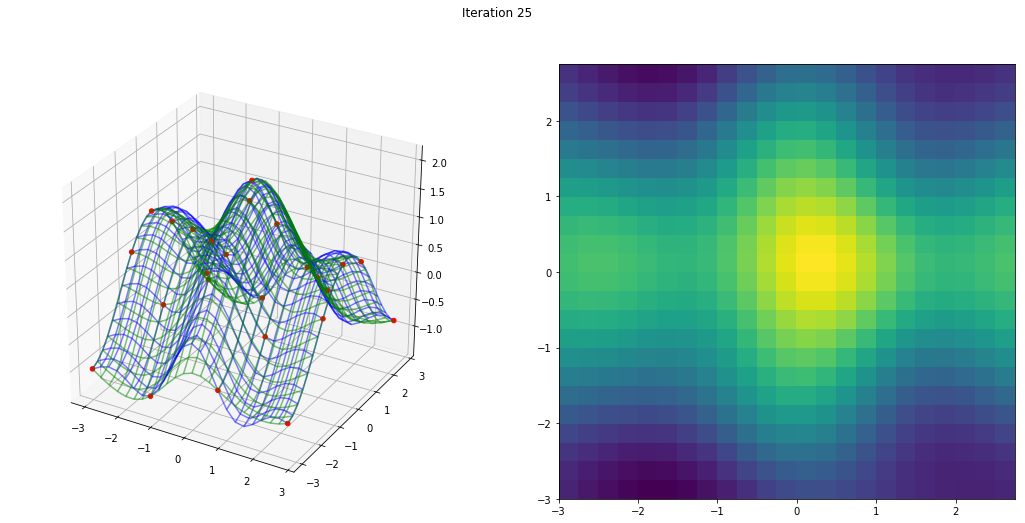

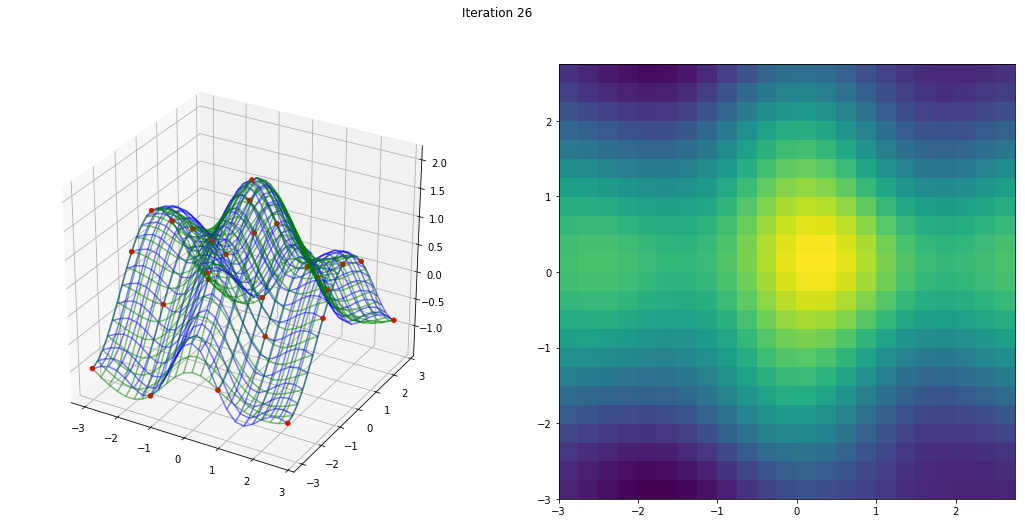

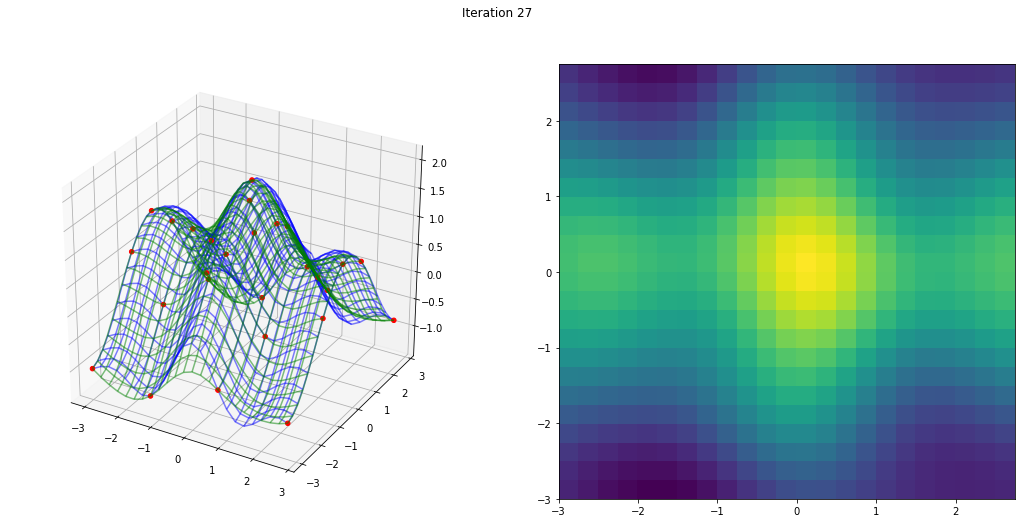

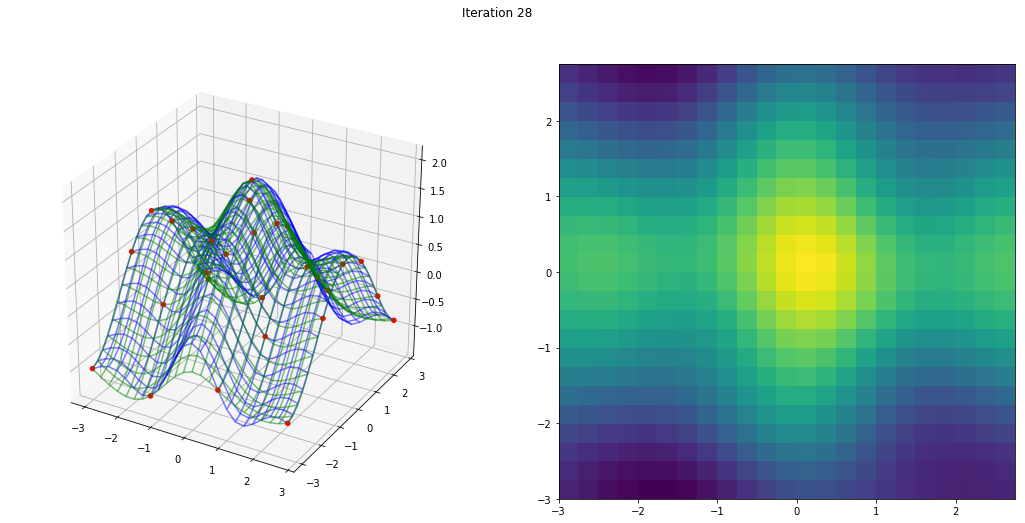

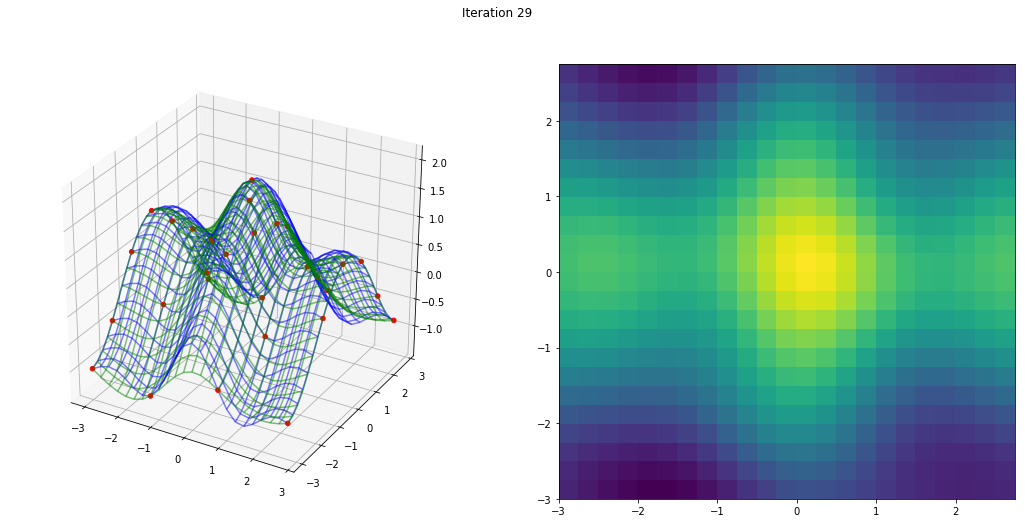

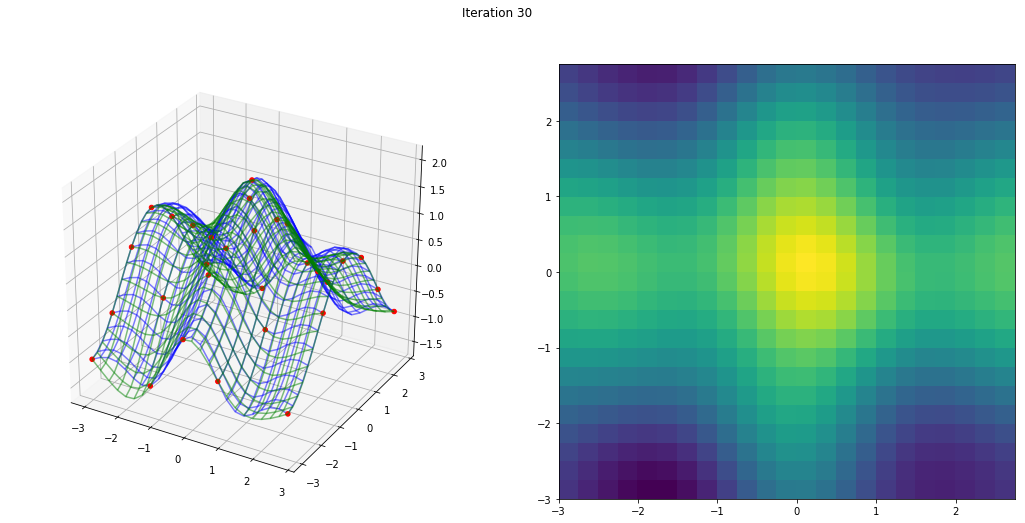

In [166]:
if __name__ == '__main__':
  class DummyEnvironment(object):
    def sample(self, j):
      return np.sinc(j[0])+np.cos(j[1])

  x = np.arange(-3, 3, 0.25)
  y = np.arange(-3, 3, 0.25)
  env = DummyEnvironment()
  agent = GPUCB(np.meshgrid(x, y), env)

  #Actual Field
  X, Y = np.meshgrid(x, y) 
  Z = np.sinc(X)+np.cos(Y)
  plt.pcolormesh(X,Y,Z)
  plt.title("Actual Field")
  
  #Mapping the Field--
  for i in range(30):
    print "Sampling Location "+ str(i) + " is" 
    agent.learn()
    agent.plot()